#Building CNN-Convolutional Neural Network

##Project Fashion-Classification = End to End

   Train Convolutional Neural Netwrok on 60,000
   Fashion-MNIST Images (data in NP array)

   Test Convolutional Neural Netwrok on 10,000
   Fashion-MNIST Images (data in NP array)

#Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

#Load Data

In [4]:
(X_train,y_train),(X_test,y_test) =  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0] # lable

9

In [28]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0=> T-shirt/top
1=> Trouser
2=> Pullover
3=> Dress
4=> Coat
5=> Sandal
6=> Shirt
7=> Sneaker
8=> Bag
9=> Ankle boot
'''


'\n0=> T-shirt/top\n1=> Trouser\n2=> Pullover\n3=> Dress\n4=> Coat\n5=> Sandal\n6=> Shirt\n7=> Sneaker\n8=> Bag\n9=> Ankle boot\n'

#Show Image

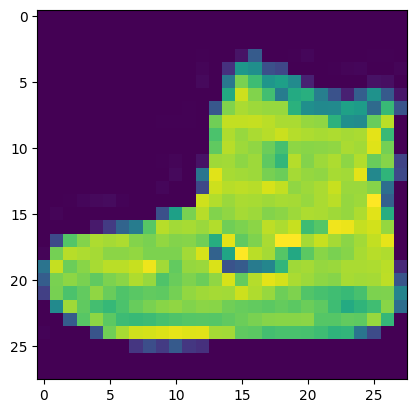

In [10]:
plt.imshow(X_train[0])

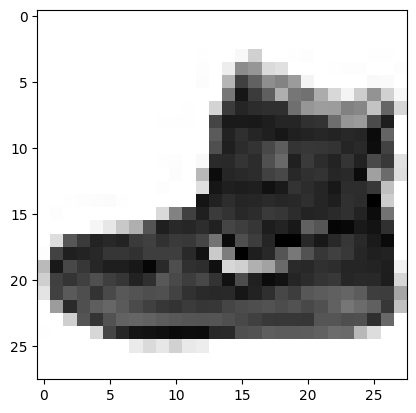

In [11]:
plt.imshow(X_train[0],cmap = 'Greys') # cmap for black and white image

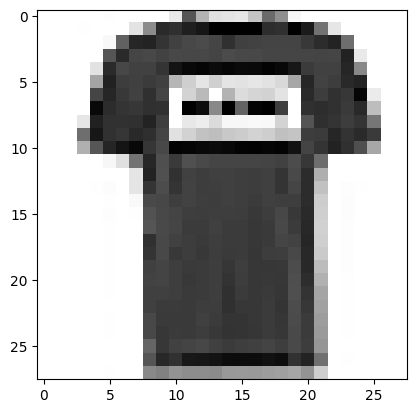

In [12]:
plt.imshow(X_train[1],cmap = 'Greys')

In [13]:
y_test[1]

2

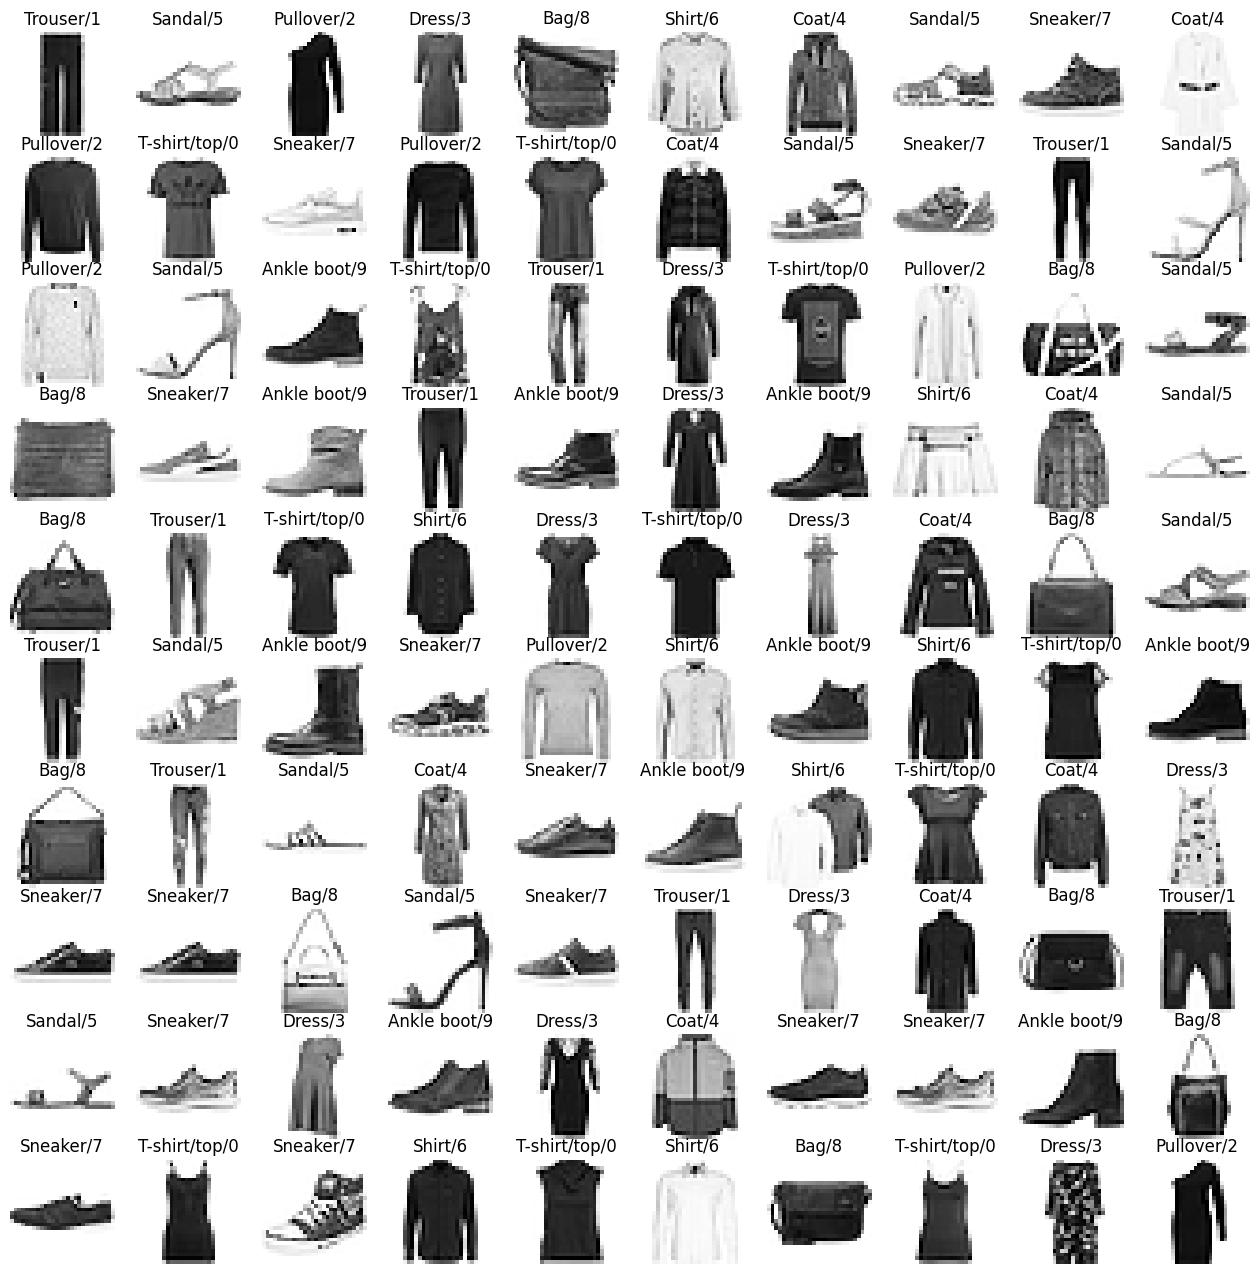

In [14]:
plt.figure(figsize = (16,16))

j=1
for i in np.random.randint(0,1000,100):
  plt.subplot(10,10,j);
  j+=1
  plt.imshow(X_train[i],cmap = 'Greys')
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

#Change Dimenssion

In [29]:
X_train.shape

(48000, 28, 28, 1)

In [15]:
X_train.ndim

3

In [16]:
X_train = np.expand_dims(X_train,-1) # change the dimenssion to 4
X_test = np.expand_dims(X_test,-1)

In [17]:
X_train.ndim

4

In [18]:
X_train.shape

(60000, 28, 28, 1)

#Feature Scaling

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# Split Dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_val,y_train, y_val = train_test_split(X_train , y_train , test_size = 0.2 , random_state= 2020)

In [22]:
X_train.shape , y_train.shape

((48000, 28, 28, 1), (48000,))

In [23]:
X_val.shape , y_val.shape

((12000, 28, 28, 1), (12000,))

#Concolutional Neural Network - Model Building

In [30]:
model = keras.models.Sequential([
                        keras.layers.Conv2D(filters = 32 , kernel_size= 3 , strides=(1,1),padding = 'valid', activation='relu', input_shape = [28,28,1]),
                        keras.layers.MaxPooling2D(pool_size=(2, 2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units = 128 , activation = 'relu'),
                        keras.layers.Dense(units = 10 , activation = 'softmax')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [32]:
from keras.src.metrics.accuracy_metrics import accuracy
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [33]:
model.fit(X_train, y_train, epochs= 10, batch_size =512, verbose =1, validation_data =(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 13s 13ms/step - loss: 0.6228 - accuracy: 0.7951 - val_loss: 0.4129 - val_accuracy: 0.8582
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3716 - accuracy: 0.8691 - val_loss: 0.3652 - val_accuracy: 0.8741
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3281 - accuracy: 0.8851 - val_loss: 0.3372 - val_accuracy: 0.8830
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2976 - accuracy: 0.8963 - val_loss: 0.3159 - val_accuracy: 0.8894
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2783 - accuracy: 0.9021 - val_loss: 0.3051 - val_accuracy: 0.8929
Epoch 6/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2623 - accuracy: 0.9067 - val_loss: 0.2960 - val_accuracy: 0.8975
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2423 - accuracy: 0.9154 - val_loss: 0.2896 - val_accuracy: 0.8972
Epoch 8/10
94/94 [

#Test and Evaluate Model

In [34]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 109ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [35]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 22ms/step


9

In [36]:
y_test[0]

9

In [37]:
y_pred =  model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.08, 0.05, 0.  ]], dtype=float32)

In [38]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2753 - accuracy: 0.9002


[0.2753202021121979, 0.9002000093460083]

#Visualize Outptut

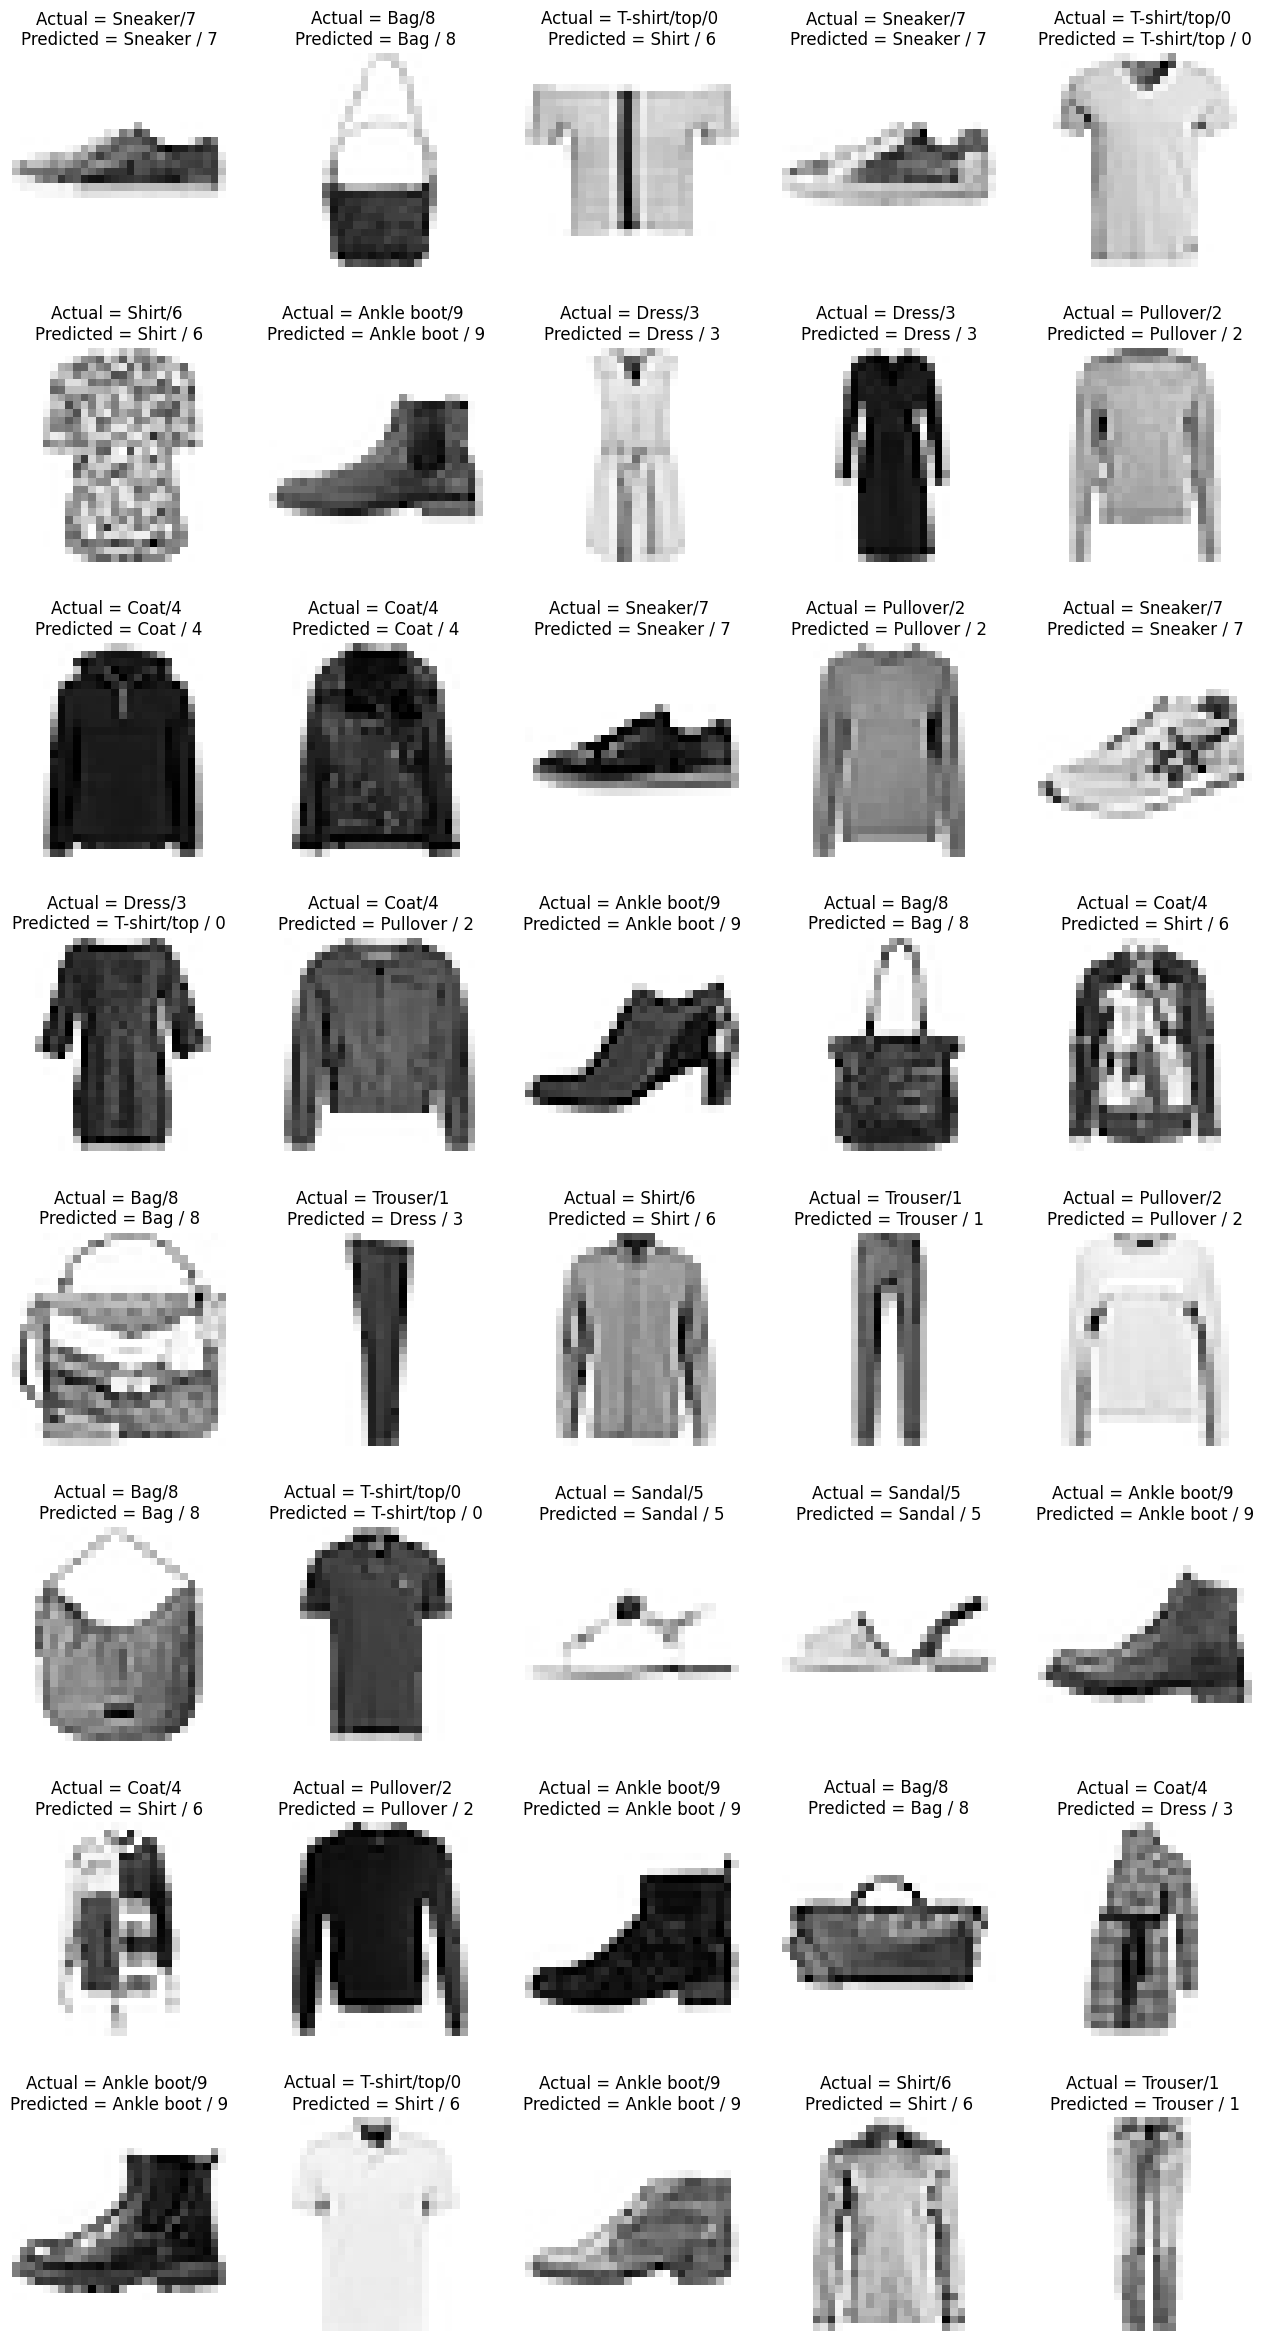

In [42]:
plt.figure(figsize = (16,30))

j=1
for i in np.random.randint(0,1000,40):
  plt.subplot(8,5,j);
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {}/{} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])] , np.argmax(y_pred[i])))
  plt.axis('off')

#Confusion Matrix

<Axes: >

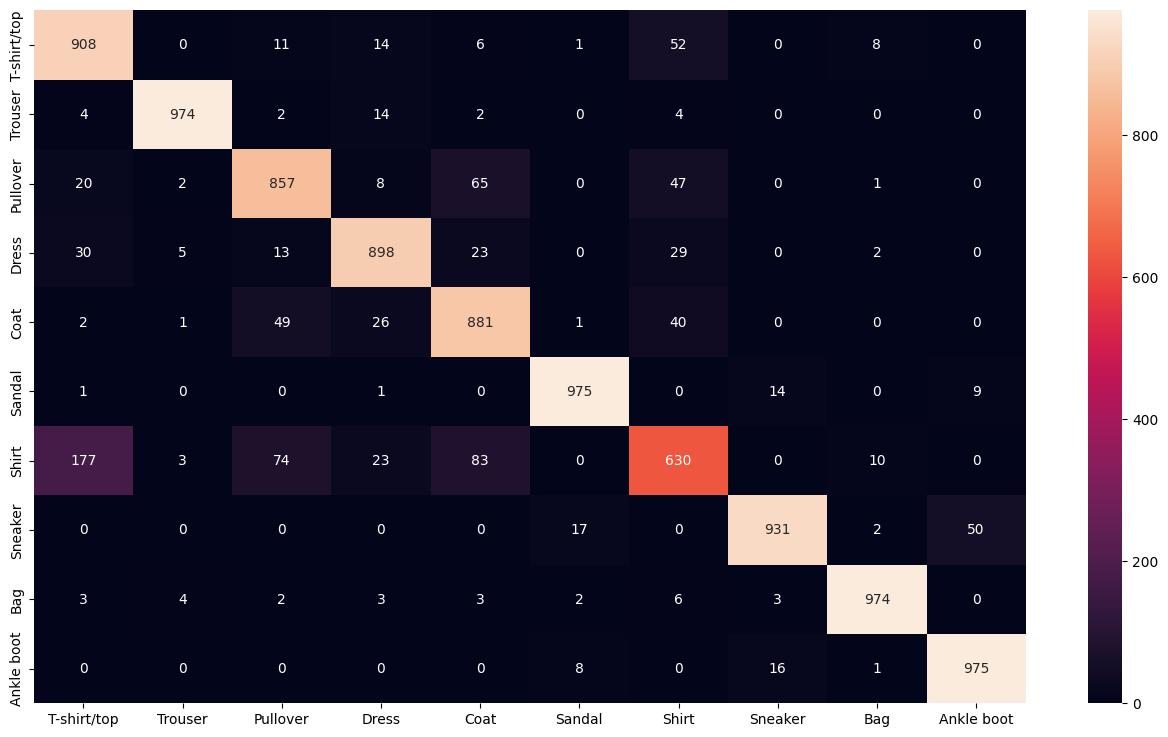

In [47]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test , y_pred_labels)
sns.heatmap(cm, annot=True , fmt = 'd', xticklabels=class_labels, yticklabels=class_labels)

# Precision = TP/(TP+FP)
#Recall = TP/(TP+FN)


In [49]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred_labels , target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.91      0.85      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.85      0.86      0.85      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.83      0.88      0.85      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.78      0.63      0.70      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [50]:
model.save('fashion_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
path= "/content/drive/MyDrive/model_save_cnn.h5"
model.save(path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
model_deploy = keras.models.load_model("fashion_classification.h5")

In [55]:
model_deploy.predict(X_test).round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.08, 0.05, 0.  ]], dtype=float32)

In [56]:
model_deploy.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

1/1 [==============================] - 0s 83ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [57]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0],axis = 0)))

1/1 [==============================] - 0s 18ms/step


9